In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#linear algebra
import numpy as np
import pandas as pd
import sys
 

#statistical tests
from scipy import stats
from scipy.stats import pearsonr, spearmanr


from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import median_absolute_error, r2_score, mean_absolute_error, mean_squared_error
from statsmodels.formula.api import ols

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
import bamboolib as bam
import plotly.graph_objs as go

#display max columns
pd.set_option('display.max_columns', None)
#use this format specifier exactly AS IS to avoid breaking module, space matters!
pd.options.display.float_format = '{:20,.2f}'.format 
sns.set_style("white")

In [2]:
# the system path
sys.path.append('/Users/Ray/codeup-data-science/fifa')
 
# importing the function
from acquire import get_fifa_data

In [3]:
import sys
 
# the system path
sys.path.append('/Users/Ray/codeup-data-science/fifa')
 
# importing split
import prepare, model

In [4]:
#acquire
df = get_fifa_data()

In [5]:
#prepare
df = prepare.prepped_data(df)

Before dropping nulls, 142079 rows, 111 cols
After dropping nulls. 131489 rows. 66 cols
After cleaning the data and adding additional columns there are: 98804 rows. 83 cols


In [6]:
#return defenders df after prepped
goalkeeper_df, forward_df, midfielder_df, defender_df = prepare.acquire_players_by_position(df)

In [7]:
# 1) Does age impact salary?
# 2) Does seniority(length of time playing with a club) impact salary?
# 3) Does the league a player is with impact salary?
# 4) Do players with unusual body types have higher or lower salaries?
# 5) Does nationality impact salary?
# 6) Does international reputation impact salary?
# 7) Does contract length positively or negatively impact salary? (edited) 

In [8]:
#split data on defenders
train, validate, test = prepare.split(defender_df)
train

Train: 19072 rows, 83 cols
Validate: 8542 rows, 83 cols
Test: 4647 rows, 83 cols


       sofifa_id             short_name player_positions  overall  potential  \
212       164240           Thiago Silva               CB       87         87   
218       179944             David Luiz               CB       82         83   
224        53405                Maxwell               LB       77         77   
225       183937        G. van der Wiel               RB       77         80   
452       198076           A. Abdennour               CB       79         83   
...          ...                    ...              ...      ...        ...   
96885     241553             C. Collins               CB       49         62   
97077     245417              J. Manley               CB       48         59   
97760     213715                N. Baba               CB       52         64   
98745     241613                K. Katz               CB       54         71   
98748     242149  K. Kouassivi-Benissan               RB       52         70   

                 value_eur             

In [43]:
# graphs age vs salary on boxplot
fig = px.box(train.sample(n=10000, replace=False, random_state=123).sort_index(), x='age', y='wage_eur', hover_name='wage_eur', template='presentation', title='Does Age impact Salary?')
fig

In [42]:

fig = px.box(train.sample(n=10000, replace=False, random_state=123).sort_index(), x='seniority', y='wage_eur', template='presentation', title='Does Seniority impact Salary?')
fig

In [44]:

fig = px.scatter(train.sample(n=10000, replace=False, random_state=123).sort_index(), x='league_name', y='value_eur', color='league_yr_sum', template='presentation', title='Does the League a Player is with impact Salary?')
fig.update_xaxes(categoryorder='total descending')
fig

In [10]:
#categorical columns
catcols = [col for col in train.columns if train[col].dtype == 'O']
catcols

['short_name',
 'player_positions',
 'club_name',
 'league_name',
 'nationality_name',
 'club_position',
 'position',
 'field_position',
 'club_joined',
 'body_type',
 'preferred_foot',
 'work_rate']

In [11]:
#numerical columns
numcols = [col for col in train.columns if train[col].dtype !='O']
numcols

['sofifa_id',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'nationality_id',
 'club_contract_valid_until',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physical',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill_dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'gk_speed',
 'year',
 'total_wage',
 'age_bins',
 'height_bins',
 'weight_bins',
 'year_joined',
 'wage_year',
 'league_yr_sum',
 'club_name_yr_sum',
 'seniority',
 'club_position_encoded',
 'wo

In [12]:
#return unique numerical values
unique_values = df.select_dtypes(include='number').nunique().sort_values()

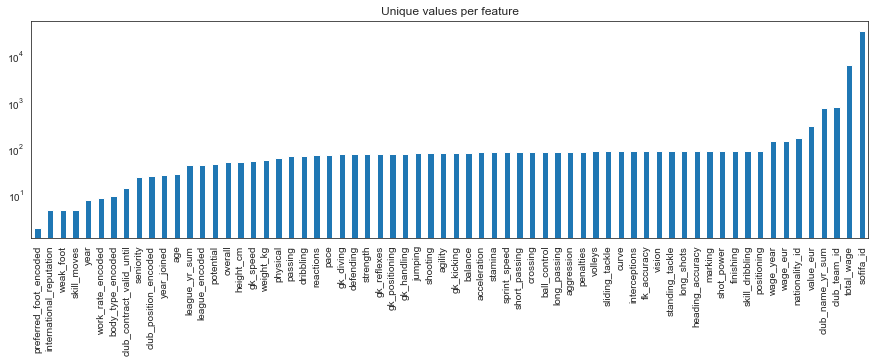

In [13]:
# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4),
                       title="Unique values per feature");

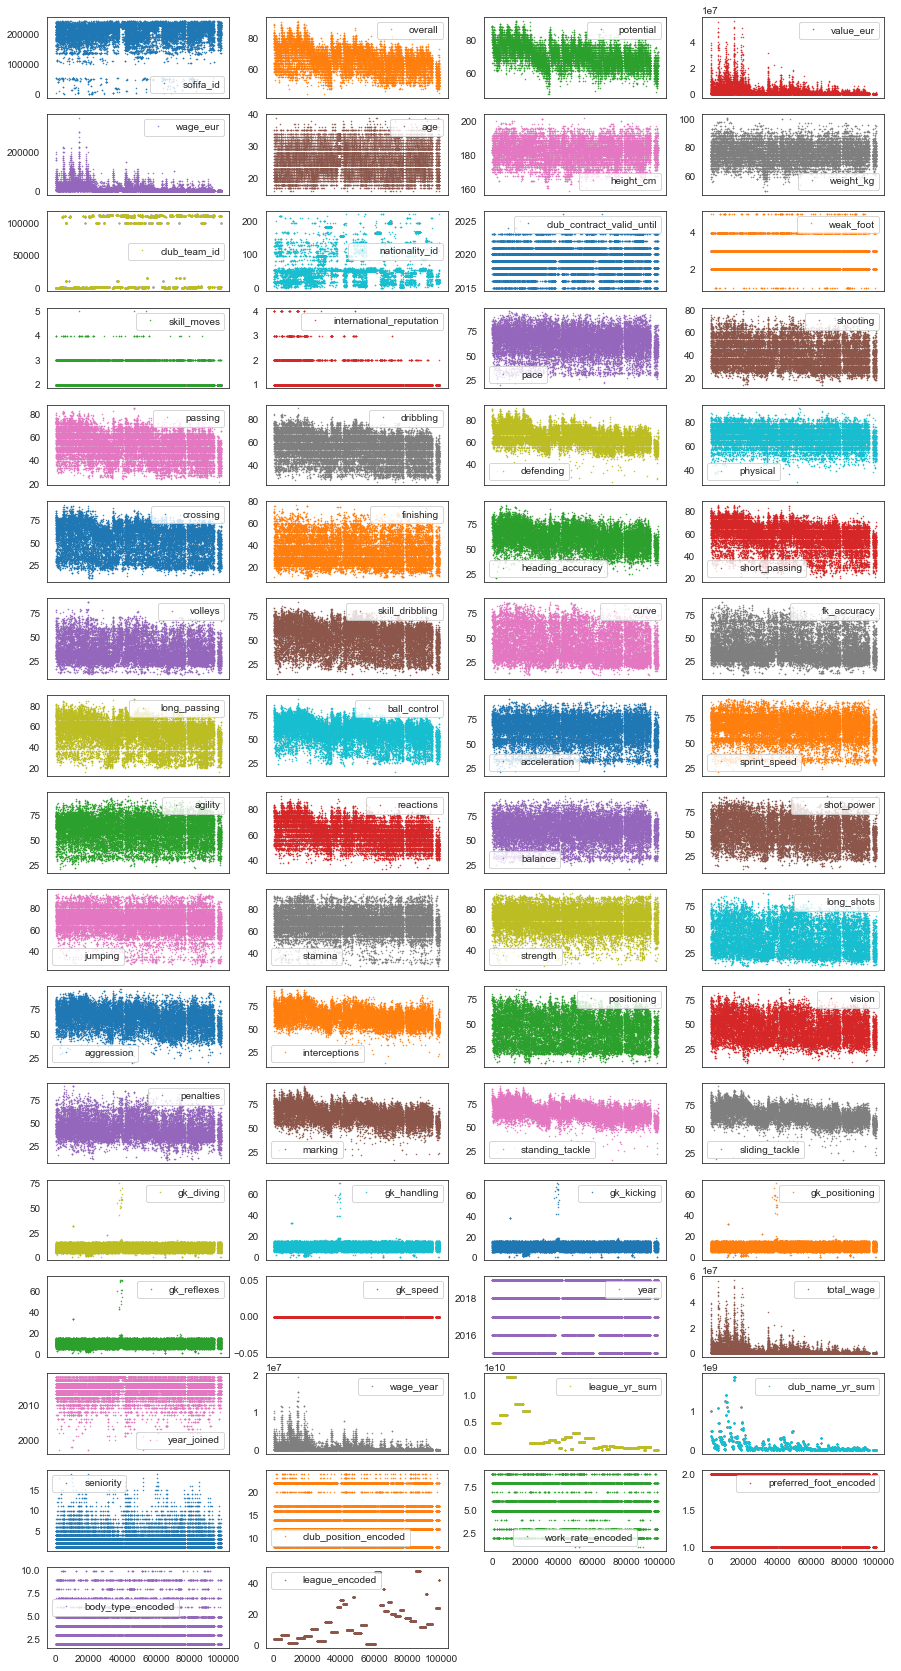

In [14]:
#plots all numerical values
#lw=0: lw stands for line width. 0 means that we don't want to show any lines
#marker=".": Instead of lines, we tell the plot to use . as markers for each data point
#subplots=True: subplots tells pandas to plot each feature in a separate subplot
#layout=(-1, 4): This parameter tells pandas how many rows and columns to use for the subplots. 
#The -1 means "as many as needed", while the 2 means to use 2 columns per row.
#figsize=(15, 30), markersize=1: To make sure that the figure is big enough we recommend to have a 
#figure height of roughly the number of features, and to adjust the markersize accordingly.

train.plot(lw=0, marker='.',subplots=True,layout=(-1,4),figsize=(15,30),markersize=1);

In [15]:
# General look at how many unique values each of these non-numerical features contain, and how often their most
# frequent category is represented.
train.describe(exclude=['number','datetime'])

       short_name player_positions    club_name                 league_name  \
count       19072            19072        19072                       19072   
unique       8539              308          651                          35   
top       Marcelo               CB  FC Augsburg  Argentina Primera División   
freq           16             8702           62                        1081   

       nationality_name club_position    position field_position club_joined  \
count             19072         19072       19072          19072       19072   
unique              145             9           9              3        1705   
top           Argentina           SUB  Substitute       Defender  2015-07-01   
freq               1271          7516        7516           8589         619   

               body_type preferred_foot      work_rate age_bins height_bins  \
count              19072          19072          19072    19072       19072   
unique                 9              2      

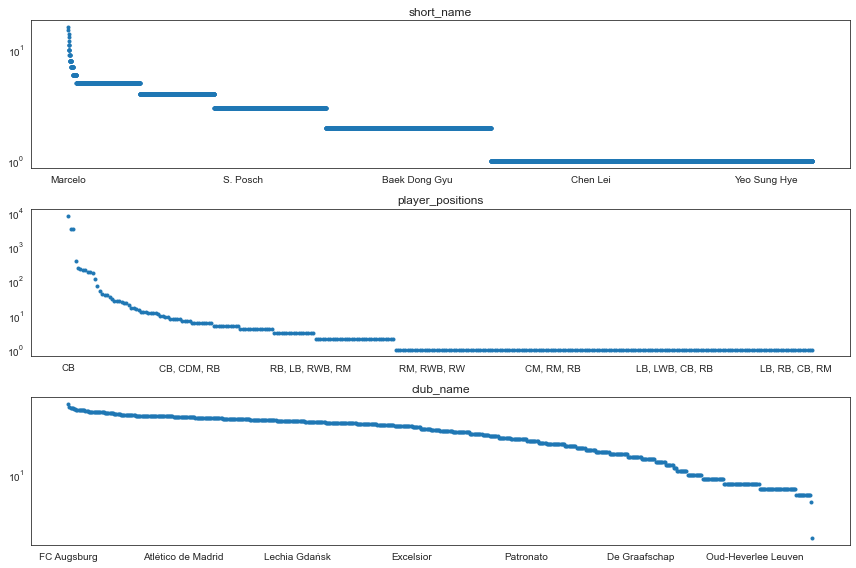

In [16]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = train.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

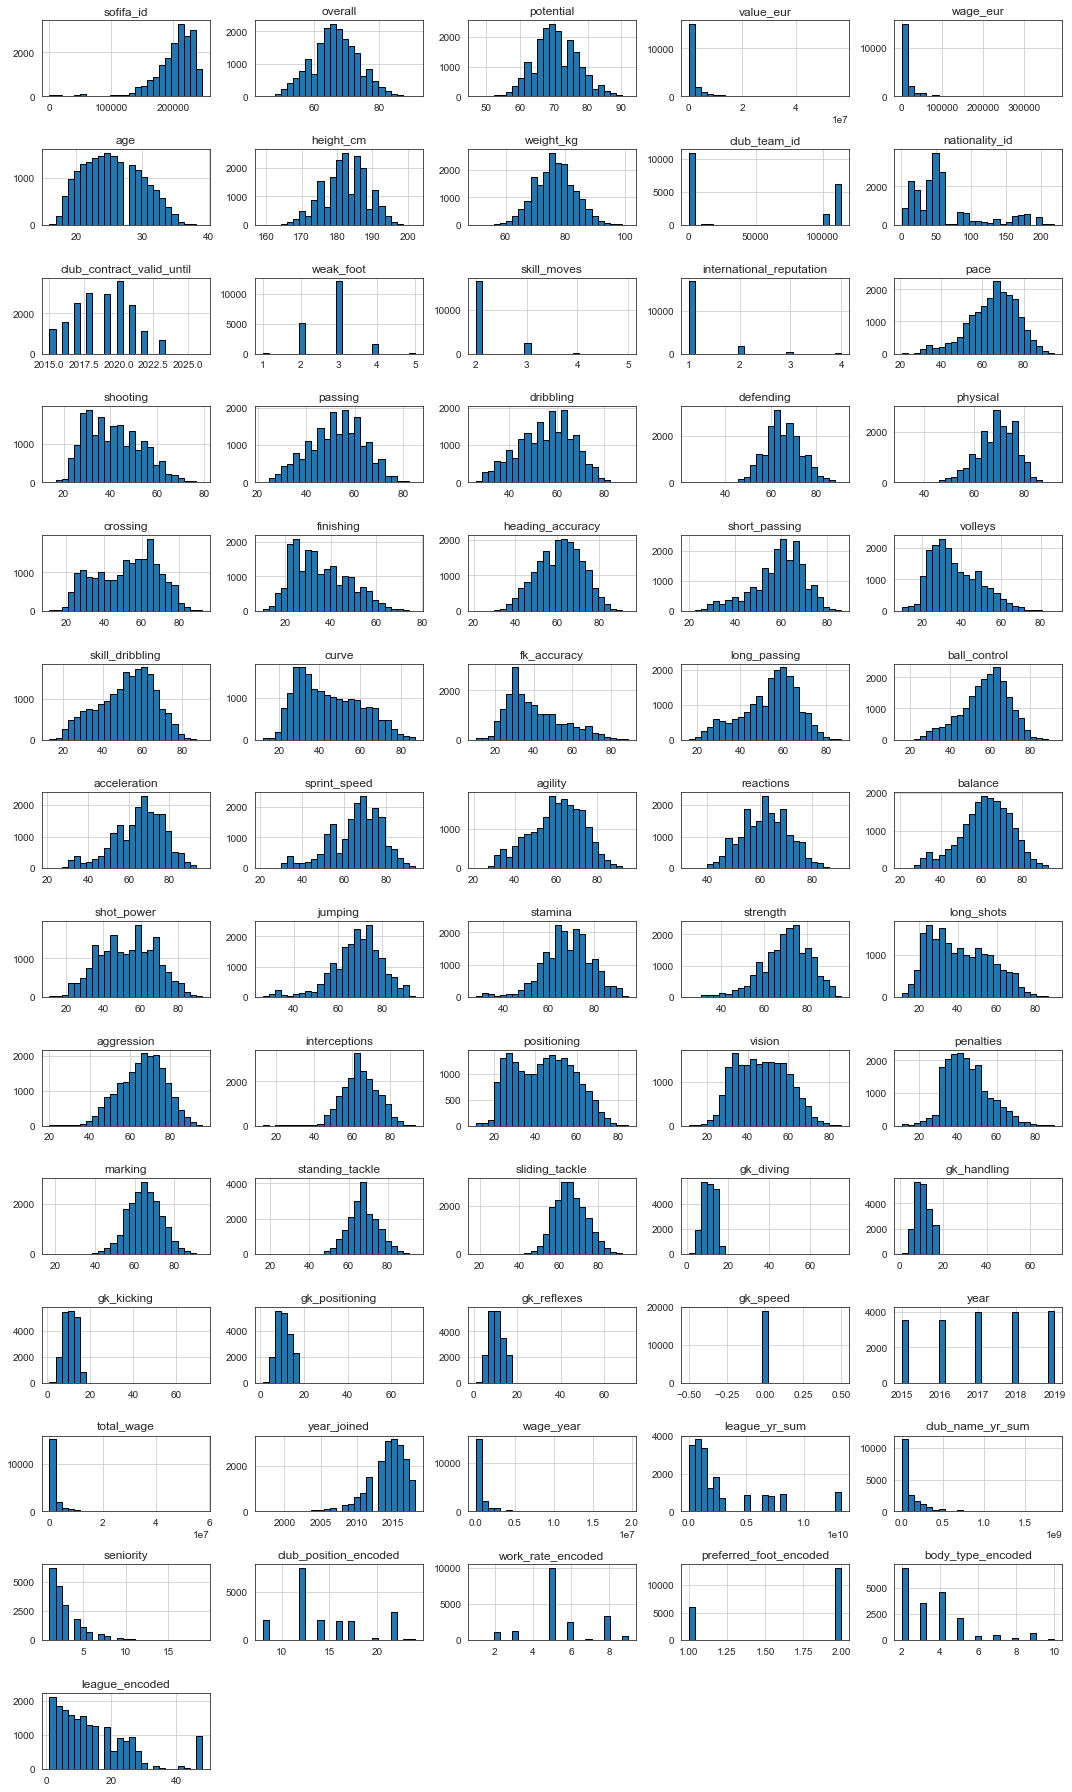

In [17]:
# Plots the histogram for each numerical feature in a separate subplot
train.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

# Feature patterns
Next step on the list is the investigation of feature specific patterns. The goal of this part is two fold:

> 1. Can we identify particular patterns within a feature that will help us to decide if some entries need to be dropped or modified?
> 2. Can we identify particular relationships between features that will help us to better understand our dataset?
> - randomly selected features

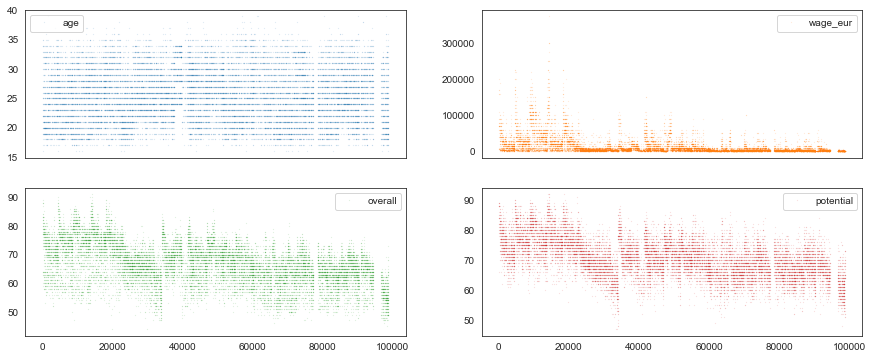

In [18]:
train[["age",
      "wage_eur",
      'overall',
      'potential']].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2),
  markersize=0.1, figsize=(15, 6));

In [19]:
# Creates mask to identify numerical features with at least 25 unique features
cols_continuous = train.select_dtypes(include="number").nunique() >= 25

In [20]:
# Create a new dataframe which only contains the continuous features
df_continuous = train[cols_continuous[cols_continuous].index]
df_continuous.shape

(19072, 53)

In [21]:
#takes too long to run.

#sns.pairplot(df_continuous, height=1.5,
             #plot_kws={"s": 2, "alpha": 0.2});

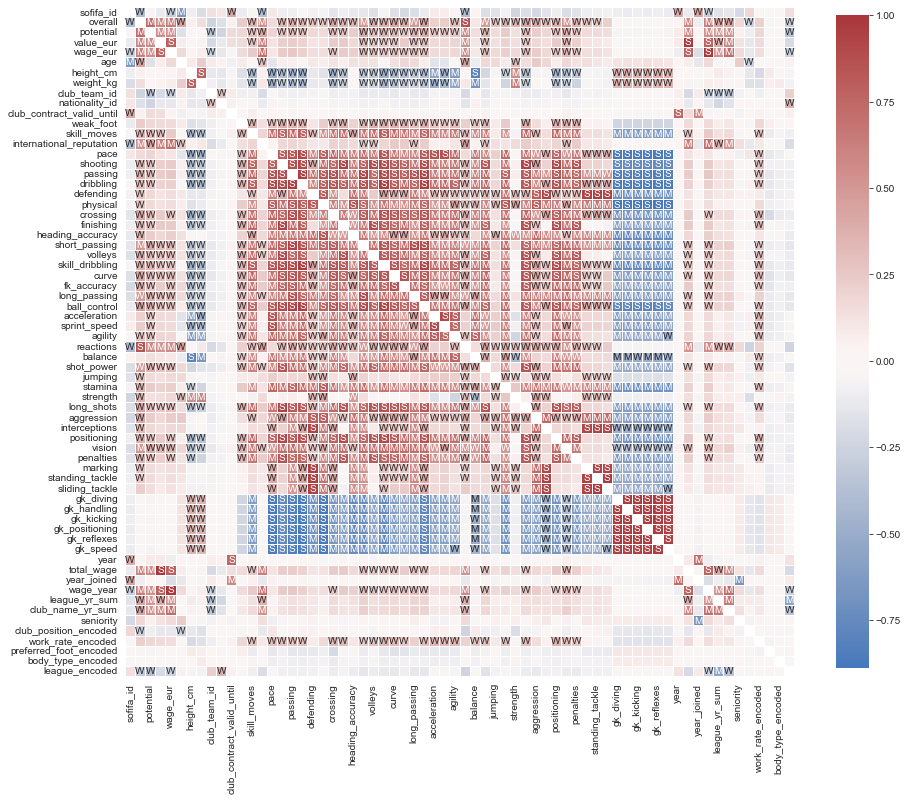

In [22]:
# Computes feature correlation
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

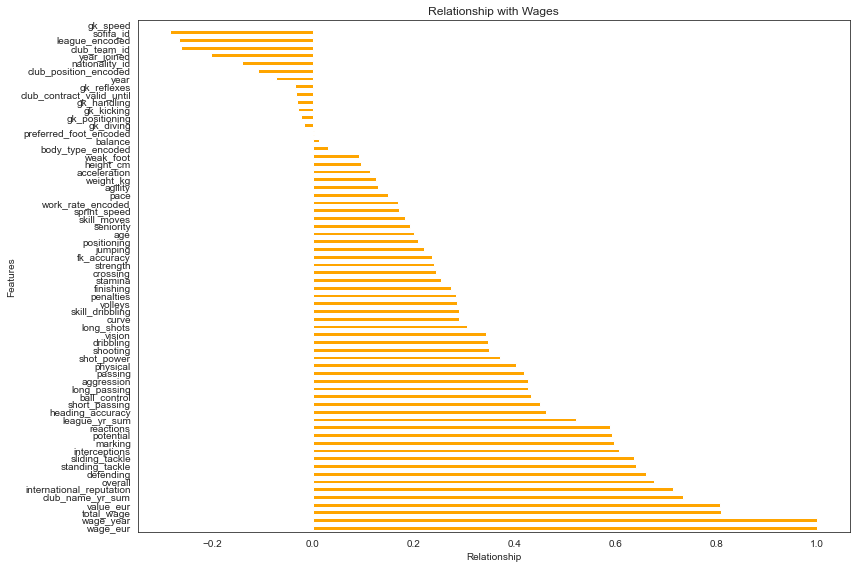

In [23]:
plt.figure(figsize = (12 , 8))
train.corr()['wage_eur'].sort_values(ascending = False).plot(kind = 'barh', color = 'orange')
#plt.figure(figsize= 3,3)
plt.title('Relationship with Wages')
plt.xlabel('Relationship')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# - 1.) Does age impact salary?

Pearson's Correlation Coefficient

$\alpha$ = .05

$𝐻_{0}$: There is no linear correlation with between age and salary.

𝐻𝑎: There is a linear relationship between age and salary.

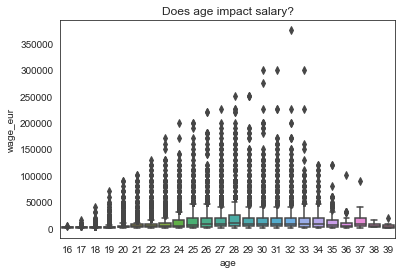

In [24]:
#rays visualization
sns.boxplot(train.age, train.wage_eur)
plt.title("Does age impact salary?")
rcParams['figure.figsize'] = 12, 5
plt.show()

In [25]:
import pandas as pd
df = pd.read_csv(r'/Users/Ray/codeup-data-science/fifa/Ray/fifa.csv', sep=',', decimal='.', nrows=100000)
df

       sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
99995     226592  https://sofifa.com/player/226592/jakub-jankto/...   
99996     226615  https://sofifa.com/player/226615/franco-caneve...   
99997     226711  https://sofifa.com/player/226711/nik-omladic/1...   
99998     226723  https://sofifa.com/player/226723/leonardo-sald...   
99999     226733  https://sofifa.com/player/226733/david-ramirez...   

              short_name                            long_name  \
0               L. Messi       Lionel Andrés Messi Cuccittini   
1         R. Lewa

In [26]:
#set alpha
α = 0.05

#perform test
r, p = pearsonr(train.age, train.wage_eur)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r:.3f}\nP-value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Correlation Coefficient: 0.200
P-value: 0.000
Reject the null hypothesis.


# 2) Does seniority(length of time playing with a club) impact salary?

Spearman's Correlation Coefficient

$\alpha$ = .05

$𝐻_{0}$: There is no linear correlation with between seniority and salary.

𝐻𝑎: There is a linear relationship between seniority and salary.

In [27]:
#seniority not normally distributed, use Spearman's
#set alpha
α = 0.05

#perform test
r, p = spearmanr(train.seniority, train.wage_eur)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r:.3f}\nP-value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Correlation Coefficient: 0.151
P-value: 0.000
Reject the null hypothesis.


### 3) Does the league a player is with impact salary?

$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: League and salary are independent.

𝐻𝑎: League and salary are not independent.

In [28]:
#setup crosstab
observed = pd.crosstab(train.league_name, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

P Value: 0.000
Reject the null hypothesis.


#### Are the wages of the English Premier League significantly higher than the mean wage?

One Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: EPL mean wages are <= than the combined mean wages of all the leagues.

𝐻𝑎: EPL mean wages are > than the combined mean wages of all the leagues.

In [29]:
#set alpha
α = 0.05

#get sample
epl_sample = train[train.league_name == 'English Premier League'].wage_eur

#get mean
overall_mean = train.wage_eur.mean()

#perform test
t, p = stats.ttest_1samp(epl_sample, overall_mean)

#print p-value
print(f'P Value: {p/2:.3f}')

#evaluate if mean of EPL wages is significantly higher than all wages, is p/2 < a and t > 0?
if p/2 < α and t > 0:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

P Value: 0.000
Reject the null hypothesis.


#### Are the wages of FC Barcelona significantly higher than the mean wage?

One Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: FC Barcelona mean wages are <= than the combined mean wages.

𝐻𝑎: FC Barcelona mean wages are > than the combined mean wages of all the leagues.

In [30]:
#set alpha
α = 0.05

#get sample
bar_sample = train[train.club_name == 'FC Barcelona'].wage_eur

#get mean
overall_mean = train.wage_eur.mean()

#perform test
t, p = stats.ttest_1samp(bar_sample, overall_mean)

#print p-value
print(f'P Value: {p/2:.3f}')

#evaluate if mean of Barcelona wages is significantly higher than all wages, is p/2 < a and t > 0?
if p/2 < α and t > 0:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

P Value: 0.000
Reject the null hypothesis.


### 4) Do players with unusual body types have higher or lower salaries?

In [31]:
#add chi^2 for the unusual body types column

#### Is there a linear relationship between height and salary?

Pearson's R

$\alpha$ = .05

$𝐻_{0}$: There is no linear relationship between height and salary.

𝐻𝑎: There is a linear relationship between height and salary.

In [32]:
#height is normally distributed, use Pearson's
#set alpha
α = 0.05

#perform test
r, p = pearsonr(train.height_cm, train.wage_eur)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r:.3f}\nP-value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Correlation Coefficient: 0.095
P-value: 0.000
Reject the null hypothesis.


#### Is there a linear relationship between weight and salary?

Pearson's R

$\alpha$ = .05

$𝐻_{0}$: There is no linear relationship between weight and salary.

𝐻𝑎: There is a linear relationship between weight and salary.

In [33]:
#weight is normally distributed, use Pearson's
#set alpha
α = 0.05

#perform test
r, p = pearsonr(train.weight_kg, train.wage_eur)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r:.3f}\nP-value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Correlation Coefficient: 0.125
P-value: 0.000
Reject the null hypothesis.


### 5) Does nationality impact salary?

#### Is there a linear relationship between nationality and salary?
$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: Nationality and salary are independent.

𝐻𝑎: Nationality and salary are not independent.

In [34]:
#setup crosstab
observed = pd.crosstab(train.nationality_name, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

P Value: 0.000
Reject the null hypothesis.


### 6.) Does international reputation impact salary?

$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: International reputation and salary are independent.

𝐻𝑎: International reputation and salary are not independent.

In [35]:
#setup crosstab
observed = pd.crosstab(train.international_reputation, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

P Value: 0.000
Reject the null hypothesis.


### 7.) Does contract length positively or negatively impact salary?

$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: Contract and salary are independent.

𝐻𝑎: Contract and salary are not independent.

In [36]:
#Bert's visualization

fig = px.box(train, x="club_contract_valid_until", y="wage_eur", points="all", animation_frame='year', color="league_name",
                   hover_name="league_name")
fig.update_xaxes(categoryorder = 'mean ascending')
fig.update_layout(title_text='Wage Per Position and contract ', title_x=0.5)
fig.show()

In [37]:
#setup crosstab
observed = pd.crosstab(train.seniority, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

P Value: 0.000
Reject the null hypothesis.


# Feature Selection

In [38]:
features_cor =  train.corr()['wage_eur'].sort_values(ascending=False)
features_cor = pd.DataFrame(features_cor)
features_cor.head(20)

                                     wage_eur
wage_eur                                 1.00
wage_year                                1.00
total_wage                               0.81
value_eur                                0.81
club_name_yr_sum                         0.73
international_reputation                 0.71
overall                                  0.68
defending                                0.66
standing_tackle                          0.64
sliding_tackle                           0.64
interceptions                            0.61
marking                                  0.60
potential                                0.59
reactions                                0.59
league_yr_sum                            0.52
heading_accuracy                         0.46
short_passing                            0.45
ball_control                             0.43
long_passing                             0.43
aggression                               0.43

#### Select K Best
['short_passing',
 'volleys',
 'curve',
 'long_passing',
 'ball_control',
 'reactions',
 'shot_power',
 'long_shots',
 'vision',
 'potential']

#### RFE
['age',
 'weak_foot',
 'skill_moves',
 'reactions',
 'potential',
 'seniority',
 'preferred_foot_encoded',
 'age_bins_encoded',
 'weight_bins_encoded',
 'body_type_encoded']

## Create X_train, y_train, etc. by Year

#### Establish Baseline

In [39]:
#get baseline, baseline is mean/median of dependent variable yhat_baseline == baseline

baseline = round(train.wage_eur.mean(),2)

print(f' Baseline is: ${baseline}')

 Baseline is: $14011.17


In [40]:
#get baseline, baseline is mean/median of dependent variable yhat_baseline == baseline

baseline = round(train.wage_eur.median(),2)

print(f' Baseline is: ${baseline}')

 Baseline is: $5000.0


In [41]:
features = [
    'potential',
    'reactions',
    'vision',
    'short_passing',
    'long_passing',
    'ball_control',
    'curve',
    'shot_power',
    'volleys',
    'long_shots',
    'fk_accuracy',
    'crossing',
    'skill_dribbling',
    'penalties',
    'positioning',
    'age_bins_encoded',
    'weight_bins_encoded',
    'body_type_encoded',
    'seniority',
    'skill_moves',
    'weak_foot',
    'age',
    'preferred_foot_encoded']